# Worksheet 3- sd21ms198

# Problem 1

In [30]:
import numpy as np
import math as m
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [31]:
def f(x):
    return m.sin(x)

In [32]:
# Forward Difference Method
def forward(g,x,h):
    return (g(x+h)-g(x))/h

# Backward Difference Method
def backward(g,x,h):
    return (g(x)-g(x-h))/h

# Central Difference Method
def central(g,x,h):
    return (f(x+h)-f(x-h))/(2*h)

# Five-Point Approximation Method
def fivepoint(g,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)




# Part (a) of Question 1


In [48]:


k = 2*m.pi/5 # Finding differentiation at this point.
h =  np.array([0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]) # step size

matrix = [] # I am gonna save h value and different methods of differentiation values in this matrix.
for i in range(h.size):
    matrix.append([h[i],forward(f,k,h[i]),backward(f,k,h[i]),central(f,k,h[i]),fivepoint(f,k,h[i])])


headers = ['h','Forward','Backward','Central','Five Point']
table = tabulate(matrix,headers,tablefmt='pipe',floatfmt=('.4f', '.12f', '.12f', '.12f', '.12f'))
print(table)



|      h |        Forward |       Backward |        Central |     Five Point |
|-------:|---------------:|---------------:|---------------:|---------------:|
| 0.5000 | 0.063449473487 | 0.529153082377 | 0.296301277932 | 0.308392092383 |
| 0.2000 | 0.212171942203 | 0.401750052565 | 0.306960997384 | 0.309000591766 |
| 0.1000 | 0.260989011837 | 0.356015435171 | 0.308502223504 | 0.309015965544 |
| 0.0500 | 0.285116793487 | 0.332659713288 | 0.308888253388 | 0.309016930016 |
| 0.0200 | 0.299486145506 | 0.318506641802 | 0.308996393654 | 0.309016992727 |
| 0.0100 | 0.304256601163 | 0.313767087072 | 0.309011844117 | 0.309016994272 |
| 0.0050 | 0.306638070468 | 0.311393343143 | 0.309015706806 | 0.309016994369 |
| 0.0020 | 0.308065732164 | 0.309967844563 | 0.309016788364 | 0.309016994375 |
| 0.0010 | 0.308541414654 | 0.309492471091 | 0.309016942872 | 0.309016994375 |
| 0.0005 | 0.308779217375 | 0.309254745623 | 0.309016981499 | 0.309016994375 |
| 0.0002 | 0.308921886664 | 0.309112097966 | 0.30901

# Part (b) of question 1
# Here, we have $f'(x) = cos(x) $ and at $x = \dfrac{2\pi}{5} $, $cos(\dfrac{2\pi}{5}) = 0.3090169 $. Following calculation will show absolute error for different methods at x point.



|      h |        Forward |       Backward |        Central |     Five Point |
|-------:|---------------:|---------------:|---------------:|---------------:|
| 0.5000 | 0.245567520887 | 0.220136088002 | 0.012715716443 | 0.000624901992 |
| 0.2000 | 0.096845052172 | 0.092733058190 | 0.002055996991 | 0.000016402609 |
| 0.1000 | 0.048027982538 | 0.046998440796 | 0.000514770871 | 0.000001028831 |
| 0.0500 | 0.023900200888 | 0.023642718913 | 0.000128740987 | 0.000000064359 |
| 0.0200 | 0.009530848869 | 0.009489647427 | 0.000020600721 | 0.000000001648 |
| 0.0100 | 0.004760393212 | 0.004750092697 | 0.000005150257 | 0.000000000103 |
| 0.0050 | 0.002378923907 | 0.002376348768 | 0.000001287569 | 0.000000000006 |
| 0.0020 | 0.000951262211 | 0.000950850188 | 0.000000206011 | 0.000000000000 |
| 0.0010 | 0.000475579721 | 0.000475476716 | 0.000000051503 | 0.000000000000 |
| 0.0005 | 0.000237777000 | 0.000237751248 | 0.000000012876 | 0.000000000000 |
| 0.0002 | 0.000095107711 | 0.000095103591 | 0.00000

Text(0, 0.5, 'Error')

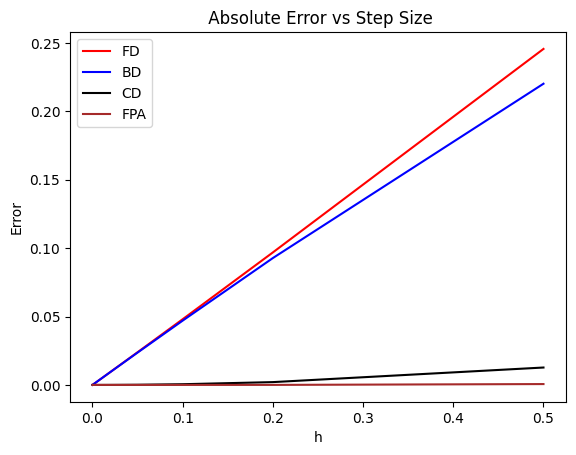

In [45]:
error =np.zeros((h.size,5))
# This matrix will contain the absolute error for different methods with different steps.
for i in range(h.size):
    error[i][0]=matrix[i][0]
    for j in range(1,5):
        error[i][j] = abs(matrix[i][j]-m.cos(k)) # Absolute error is being done by calculating difference with cos(x)

headers = ['h','Forward','Backward','Central','Five Point']
table= tabulate(error,headers,tablefmt='pipe',floatfmt=('.4f', '.12f', '.12f', '.12f', '.12f')) # Matrix has turned into a cute table.
print(table)


plt.plot(error[:,0],error[:,1],color='red')
plt.plot(error[:,0],error[:,2],color='blue')
plt.plot(error[:,0],error[:,3],color='black')
plt.plot(error[:,0],error[:,4],color='brown')

plt.legend(["FD", "BD","CD","FPA"])
plt.title(" Absolute Error vs Step Size")
plt.xlabel('h')
plt.ylabel('Error')








# Part (c) of Question 1

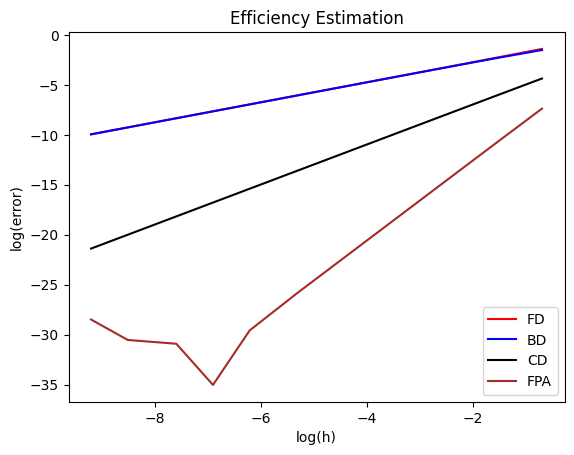

In [35]:
logerror= np.zeros(error.shape)
for i in range(error.shape[0]):
    for j in range(5):
        logerror[i][j]=m.log(error[i][j])
# I am creating a matrix where elements are corresponded to the log of corresponding element of absolute error matrix.

plt.plot(logerror[:,0],logerror[:,1],color='red')
plt.plot(logerror[:,0],logerror[:,2],color='blue')
plt.plot(logerror[:,0],logerror[:,3],color='black')
plt.plot(logerror[:,0],logerror[:,4],color='brown')
plt.legend(["FD", "BD","CD","FPA"])
plt.title("Efficiency Estimation")
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.show()

# FD and BD has been superimposed with each other.
# table= tabulate(logerror,tablefmt='grid')
# print(table)

Text(0, 0.5, 'log(error)')

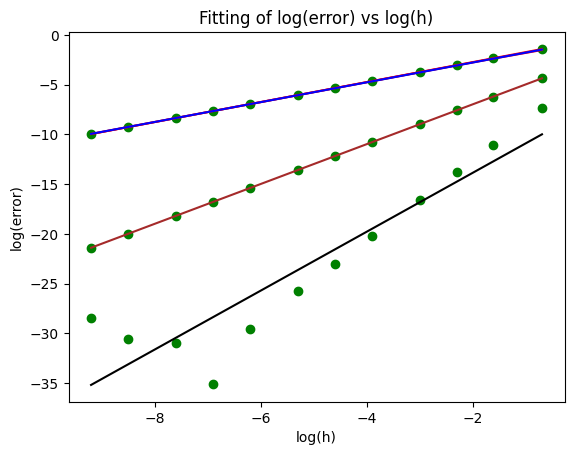

In [36]:

# Straight line has been fitted to the plots of log(error) vs log(h).

def eq_of_line(xs, p0, p1):
    return p0*xs+p1


params1, covariance1 = curve_fit(eq_of_line, logerror[:,0], logerror[:,1], p0=[1.0, 1.0])
params2, covariance2 = curve_fit(eq_of_line, logerror[:,0], logerror[:,2], p0=[1.0, 1.0])
params3, covariance3 = curve_fit(eq_of_line, logerror[:,0], logerror[:,3], p0=[1.0, 1.0])
params4, covariance4 = curve_fit(eq_of_line, logerror[:,0], logerror[:,4], p0=[1.0, 1.0])



plt.plot( logerror[:,0], logerror[:,1],'go')
plt.plot( logerror[:,0], eq_of_line( logerror[:,0], params1[0], params1[1]),color='red')

plt.plot( logerror[:,0], logerror[:,2],'r')
plt.plot( logerror[:,0], eq_of_line( logerror[:,0], params2[0], params2[1]),color='blue')

plt.plot( logerror[:,0], logerror[:,3],'go')
plt.plot( logerror[:,0], eq_of_line( logerror[:,0], params3[0], params3[1]),color='brown')

plt.plot( logerror[:,0], logerror[:,4],'go')
plt.plot( logerror[:,0], eq_of_line( logerror[:,0], params4[0], params4[1]),color='black')




plt.title("Fitting of log(error) vs log(h)")
plt.xlabel('log(h)')
plt.ylabel('log(error)')




# Problem 2

In [37]:
def f1(x):
    return m.e**x

In [38]:
# Trapezoidal Method
def trapezoidal(f,a,b,n):
    h = (b-a)/(n)
    s=0
    for i in range(0,n,2):
        s += f(a+i*h) + 2*f(a+(i+1)*h) + f(a+(i+2)*h)
    return s*(h/2)

# # Simpson's 1/3 Method

def simpson13(f,a,b,n):
    h = (b-a)/(n)
    s=0
    for i in range(0,n,2):
        s += f(a+i*h) + 4*f(a+(i+1)*h) + f(a+(i+2)*h)
    return s*(h/3)

# # Simpson's 3/8 Method

def simpson38(f,a,b,n):
    h = (b-a)/(n+1)
    s=0
    for i in range(0,n,3):
        s += f(a+i*h) + 3*f(a+(i+1)*h) + 3*f(a+(i+2)*h) +f(a+(i+3)*h)
    return s*(3*h/8)

# Bode's Method

def bode(f,a,b,n):
    h = (b-a)/(n)
    s=0
    for i in range(0,n,4): # Loop is running with every 4th element as it has to take care with four values.
        s += 7*f(a+i*h) + 32*f(a+(i+1)*h) + 12*f(a+(i+2)*h) +32*f(a+(i+3)*h) + 7*f(a+(i+4)*h)
    return s*(2*h/45)

# Part (a) of the question 2


In [39]:


n =  np.array([20, 200, 2000, 20000])
inte = [] # I am gonna save h value and different methods of differentiation values in this matrix.
for i in range(n.size):
    inte.append([n[i],trapezoidal(f1,0,1,n[i]),simpson13(f1,0,1,n[i]),simpson38(f1,0,1,n[i]),bode(f1,0,1,n[i])])

headers = ['n','Trapezoidal','Simpson 1/3','Simpson 3/8','Bode']
table = tabulate(inte,headers,tablefmt='pipe',floatfmt=('.0f', '.12f', '.12f', '.12f', '.12f'))
print(table)



|     n |    Trapezoidal |    Simpson 1/3 |    Simpson 3/8 |           Bode |
|------:|---------------:|---------------:|---------------:|---------------:|
|    20 | 1.718639788925 | 1.718281888104 | 1.718281938840 | 1.718281828516 |
|   200 | 1.718285408211 | 1.718281828465 | 1.718281828472 | 1.718281828459 |
|  2000 | 1.718281864257 | 1.718281828459 | 1.718281828459 | 1.718281828459 |
| 20000 | 1.718281828817 | 1.718281828459 | 1.718281828459 | 1.718281828459 |


# Part (b) of the question 2
# Estimated Value of this integration $= e-1$

|      h |   Trapezoidal |   Simpson 1/3 |   Simpson 3/8 |        Bode |
|-------:|--------------:|--------------:|--------------:|------------:|
| 0.05   |   0.00035796  |   5.96448e-08 |   1.10381e-07 | 5.67471e-11 |
| 0.005  |   3.57975e-06 |   5.96589e-12 |   1.31588e-11 | 0           |
| 0.0005 |   3.57975e-08 |   6.66134e-16 |   1.55431e-15 | 0           |
| 5e-05  |   3.57974e-10 |   4.21885e-15 |   6.66134e-16 | 2.44249e-15 |


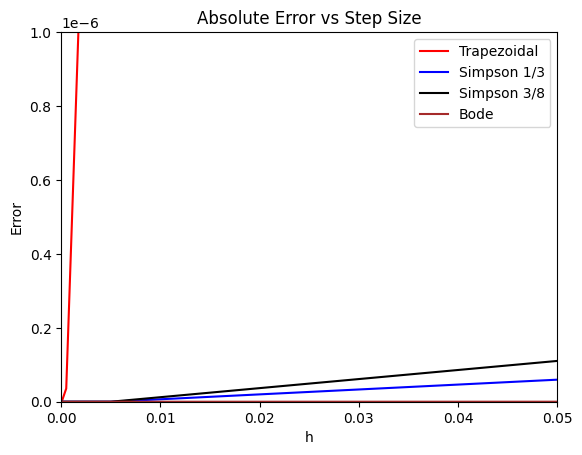

In [40]:
interror =np.zeros((n.size,5))
for i in range(n.size):
    interror[i][0]=1/inte[i][0] # Step size is the first coloumn where step size = (1-0)/number of steps
    for j in range(1,5):
        interror[i][j] = abs(inte[i][j]-m.e+1) # This m.e-1 is the absolute value of integration of function which is being deleted from calculated values.


plt.plot(interror[:,0],interror[:,1],color='red')
plt.plot(interror[:,0],interror[:,2],color='blue')
plt.plot(interror[:,0],interror[:,3],color='black')
plt.plot(interror[:,0],interror[:,4],color='brown')



plt.legend(["Trapezoidal", "Simpson 1/3","Simpson 3/8","Bode"])

plt.ylim(0,0.1e-5)
plt.xlim(0,0.05)
headers = ['h',"Trapezoidal", "Simpson 1/3","Simpson 3/8","Bode"]
table= tabulate(interror,headers,tablefmt='pipe')
print(table)

plt.title("Absolute Error vs Step Size")
plt.xlabel('h')
plt.ylabel('Error')


plt.show()


# Part c of the question 2
# I have skipped for the Bode's Method as sometimes the absolute error with exact value of integration is tending to very very close to zero (in order of $10^{-25}$). So it's tough to deal with $log 0$.


Text(0, 0.5, 'log(error)')

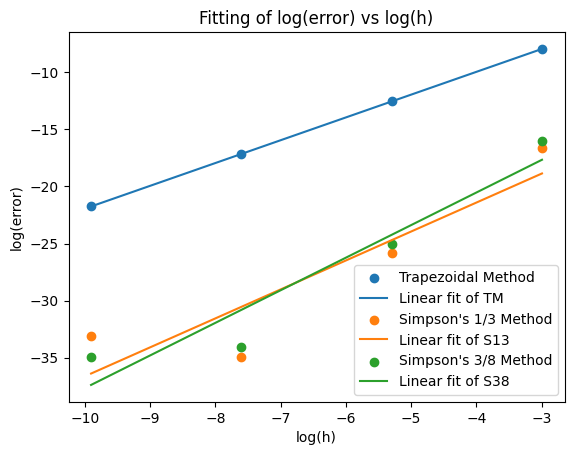

In [41]:
loginterr= np.zeros(interror.shape)
for i in range(interror.shape[0]):
      for j in range(5):
        if interror[i][j] !=0:
          loginterr[i][j]=m.log(interror[i][j])

table = tabulate(loginterr,tablefmt='pipe')

def eq_fit(x,p0,p1):
    return p0*x+p1

#Defining the function for fitting

params1, covariance1 = curve_fit(eq_of_line, logerror[:,0], logerror[:,1], p0=[1.0, 1.0])

param, cov=curve_fit(eq_fit, loginterr[:,0], loginterr[:,1], p0=[1.0,1.0])
plt.scatter(loginterr[:,0], loginterr[:,1],label="Linear")
plt.plot(loginterr[:,0],eq_fit(loginterr[:,0],param[0],param[1]),label="Linear_fit")


param1, cov1=curve_fit(eq_fit, loginterr[:,0], loginterr[:,2], p0=[1.0,1.0])
plt.scatter(loginterr[:,0], loginterr[:,2],label="Linear")
plt.plot(loginterr[:,0],eq_fit(loginterr[:,0],param1[0],param1[1]),label="Linear_fit")

param2, cov2=curve_fit(eq_fit, loginterr[:,0], loginterr[:,3], p0=[1.0,1.0])
plt.scatter(loginterr[:,0], loginterr[:,3],label="Linear")
plt.plot(loginterr[:,0],eq_fit(loginterr[:,0],param2[0],param2[1]),label="Linear_fit")


plt.legend(["Trapezoidal Method", "Linear fit of TM","Simpson's 1/3 Method", "Linear fit of S13","Simpson's 3/8 Method", "Linear fit of S38"])
plt.title("Fitting of log(error) vs log(h)")
plt.xlabel('log(h)')
plt.ylabel('log(error)')


# Problem 3
#$ \int_{0}^{1} x^{-2/3} \cdot (1 - x)^{-1/3} \, dx$
# = $ \int_{0}^{1/2} x^{-2/3} \cdot (1 - x)^{-1/3} \, dx +  \int_{1/2}^{1} x^{-2/3} \cdot (1 - x)^{-1/3} \, dx$
# = $ \int_{0}^{(1/2)^{1/3}} 3(1 - x^3)^{-1/3} \, dx +  \int_{0}^{(1/2)^{2/3}}\dfrac{3}{2} (1 - x^{3/2})^{-2/3} \, dx$
# I am gonna use simpson's 3/8 rule, while dodging the singularities, we can archieve approximation of integration, $I = \int_{0}^{a} s_1 dx + \int_{0}^{b} s_2 dx $

In [42]:
def s1(x):
 return 3*((1-x**3)**(-1/3))
def s2(x):
  return (3/2)*((1-x**(3/2))**(-2/3))

a = (1/2)**(1/3) # Upper limit of first integration
b = (1/2)**(2/3)  # Upper limit of Second integration

print('Exact Integral:',2*m.pi/m.sqrt(3) )
print('Computed value of Integral:',simpson38(s1,0,a,50000)+simpson38(s2,0,b,50000))
print(f'Absolute Error of Integral: {abs(2*m.pi/m.sqrt(3)-(simpson38(s1,0,a,50000)+simpson38(s2,0,b,50000)))}')



Exact Integral: 3.6275987284684357
Computed value of Integral: 3.6275987284684623
Absolute Error of Integral: 2.6645352591003757e-14
